In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import warnings


# Testes de Hipótese

## Entendendo valores-p

Suponhamos que você tenha um website com um banner de propaganda, e que 20% das pessoas que visitam o site clicam neste banner. A area de comunicação desenvolveu um novo banner e, ao implantar este novo banner, dos primeiros 30 clientes que o viram, 
11 pessoas clicaram no banner novo.

Como podemos descobrir se isso é um efeito aleatório ou um impacto real? Vamos simular este efeito usando amostragem computacional:

In [29]:
p = 800/3000
p

0.26666666666666666

In [30]:
primeiros_30 = np.random.choice([0, 1], p=[1 - p, p], size=30)
np.sum(primeiros_30)


10

In [31]:
np.mean(primeiros_30)

0.3333333333333333

Estamos utilizando a proporção observada nos 30 primeiros clientes que viram o banner para gerar amostrar aleatórias. O array `primeiros_30` contém uma amostra de tamanho 30, onde cada elemento tem **chance p** de ser 1 e **chance 1-p** de ser 0.

Agora, vamos simular 1000 amostras de tamanho 30 com a nossa **% de cliques original (20%)**:

In [38]:
dist_pop = []
for i in range(0, 100000):
    amostra = np.random.choice([0, 1], p=[0.8, 0.2], size=3000)
    dist_pop.append(np.mean(amostra))


In [39]:
dist_pop[0:10]

[0.19366666666666665,
 0.20633333333333334,
 0.18733333333333332,
 0.20033333333333334,
 0.20766666666666667,
 0.19966666666666666,
 0.207,
 0.204,
 0.20266666666666666,
 0.20266666666666666]

O vetor que criamos acima tem é a **distribuição de amostragem de p**:

<AxesSubplot: ylabel='Count'>

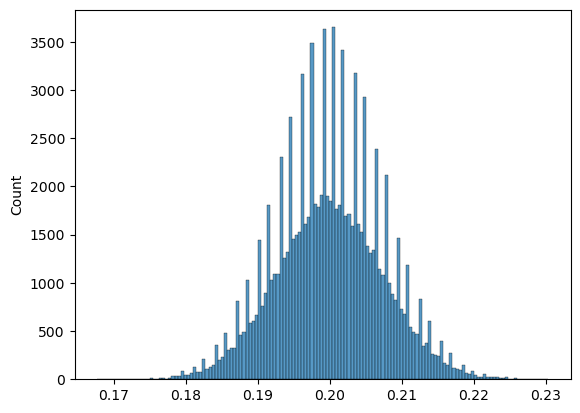

In [40]:
dist_pop = np.array(dist_pop)
sns.histplot(dist_pop)


Agora conseguimos calcular, a partir da nossa distribuição simulada, **a probabilidade de observarmos uma amostra com 11 acessos em 30 impressões**:

In [41]:
p

0.26666666666666666

In [42]:
len(dist_pop[dist_pop >= p])

0

In [43]:
len(dist_pop[dist_pop >= p]) / 100000


0.0

Se a taxa real era de 20%, a chance de observarmos 11 cliques em 30 acessos (uma taxa de 36,67%) seria de 2,6%

## Utilizando um teste-t simples

O teste-t simples nos permite comparar a média de uma amostra contra a média de um população e calcular a probabilidade da amostra pertencer à população:

* __Null hypothesis (H0): u1 = u2, a média da amostra é a média da população.__
* __Alternative hypothesis (H1): u1 != u2, a média da amostra é diferente da média da população.__

Para avaliar o resultado de um teste-t vamos utilizar o conceito de **valor-p** e **nível de confiabilidade**:

**Se nosso *valor-p* for inferior à *(1 - Nível de Confiabilidade)* vamos REJEITAR A HIPÓTESE NULA**

Vamos utilizar um teste-t para compara valores de calorias medidos em uma barra energética contra o valor afirmado na embalagem:

In [44]:
from scipy import stats

In [46]:
amostr_barra_energetica = [
    20.70, 27.46,22.15,19.85,21.29,24.75,
    20.75,22.91,25.34,20.33,21.54,
    21.08,22.14,19.56,21.10,18.04,
    24.12,19.95,19.72,18.28,16.26,
    17.46,20.53,22.12,25.06,22.44,
    19.08,19.88,21.39,22.33,25.79
]
len(amostr_barra_energetica)

31

In [47]:
valor_rotulo = 20
# (amostra, media da população)
stats.ttest_1samp(amostr_barra_energetica, valor_rotulo)
# Assumindo um nivel de confiabilidade de 95%
# 0,4% comparar 1 - Nível de Confiabilidade
# 0,4% vs 5%
# 0,4% < 5% ----> REJEITO A H0
# A amostra de barras não vem de uma população com média 20

Ttest_1sampResult(statistic=3.0668316352840814, pvalue=0.004552621060635394)

In [ ]:
# Assumindo um nivel de confiabilidade de 0.95
# 0.004 comparar 1 - Nível de Confiabilidade
# 0.004 vs 0.05
# 0.004 < 0.05 ----> REJEITO A H0
# A amostra de barras não vem de uma população com média 20

# Voltamos 10h10!

# Paired T-Test

https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv

Vamos utilizar o dataset e utilizar um teste-t em par para medir se um tratamento para hipertensão foi efetivo ou não:


In [48]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv"
)


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [50]:
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [51]:
df['residual'] = df['bp_after'] - df['bp_before']

<AxesSubplot: xlabel='residual', ylabel='Count'>

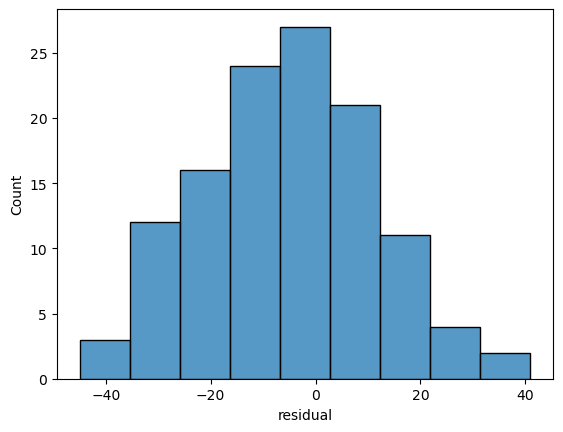

In [52]:
sns.histplot(data = df, x = 'residual')

## Assumption check 

- [ ]  The samples are independently and randomly drawn

**AND**

- [ ]  The distribution of the residuals between the two groups should follow the normal distribution

**AND**

- [ ]  The variances between the two groups are equal

**OR**

- [ ]  Approximately equal sample sizes

https://www.youtube.com/watch?v=OyB_w4XNQ58&t=315s

### Checking Normal distribution by Q-Q plot graph
https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

In [53]:
df["diff_"] = df["bp_before"] - df["bp_after"]


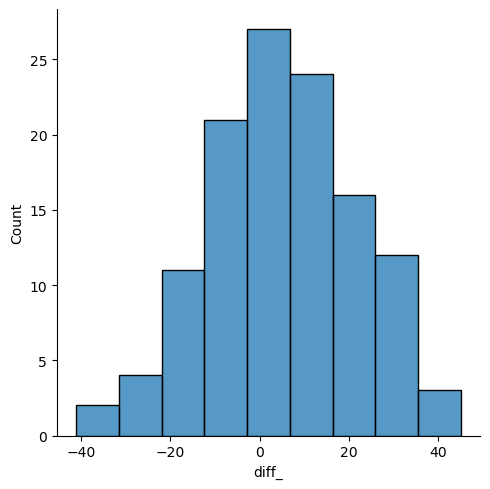

In [54]:
sns.displot(df["diff_"])


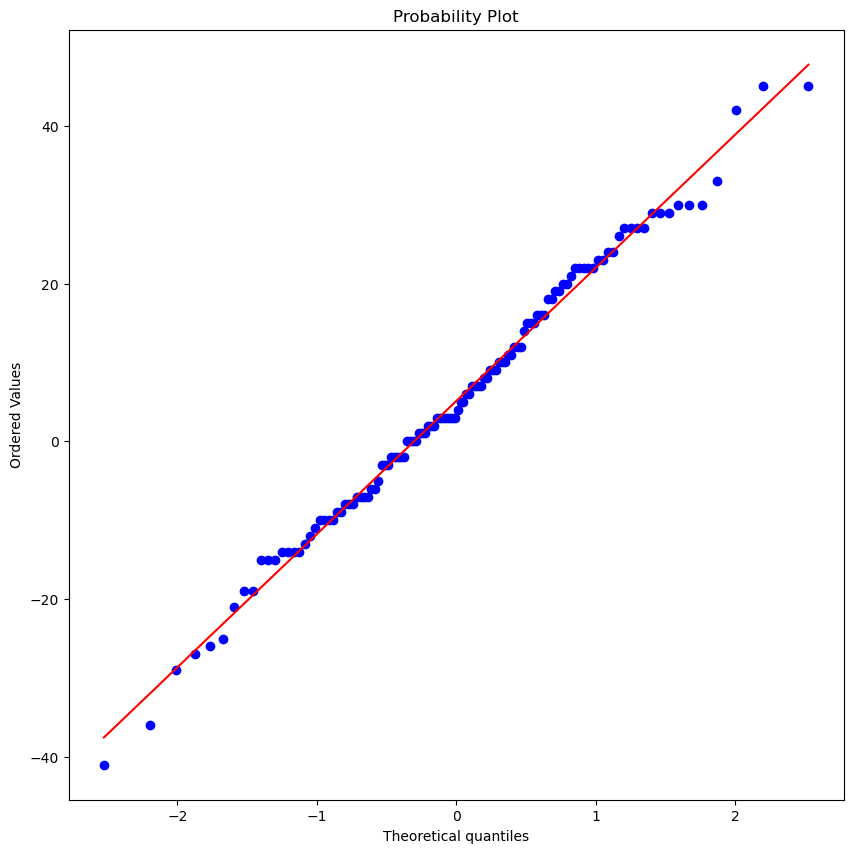

In [55]:
plt.figure(figsize=(10, 10))
stats.probplot(df["diff_"], plot=plt)
plt.show()


**Note:-** The corresponding points lies very close to line that means are our sample data sets are normally distributed

### Checking Normal distribution by method of `Shapiro stats`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [56]:
stats.shapiro(df["diff_"])


ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

### Checking if the variance is equal between samples

In [57]:
df["bp_after"].std()


14.177622226198421

In [58]:
df["bp_before"].std()


11.389845101166717

In [59]:
stats.levene(df.bp_after, df.bp_before)
# H0 = Variâncias das amostras são iguais
# Variâncias são diferentes!


LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

O teste-t é robusto à violações das premissas - mais robustos que os testes de normalidade e igualdade de variância. Portanto, embora devamos tomar cuidado com a utilização em casos extremos (especialmente com amostras pequenas), desvios das premissas do teste são toleráveis.

# Aplicando o teste de Hipótese

Testando a efetividade do tratamento.

In [60]:
df[["bp_before", "bp_after"]].describe()


,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


<AxesSubplot: ylabel='Frequency'>

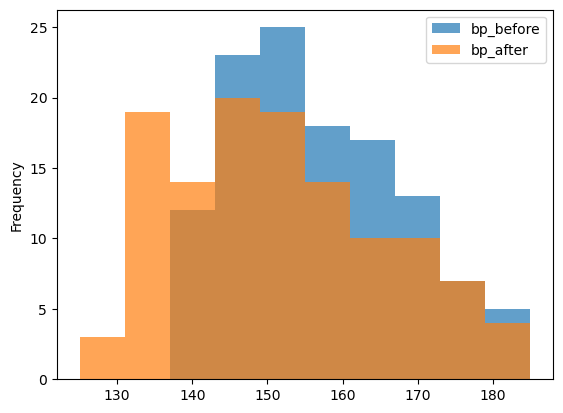

In [61]:
df[["bp_before", "bp_after"]].plot(kind="hist", alpha=0.7)


## Qual nossa hipótese nula?

* __Null hypothesis (H0): u1 = u2, a média da amostra antes do tratamento é igual a média da amostra após tratamento.__
* __Alternative hypothesis (H1): u1 != u2, a média da amostra antes do tratamento é diferente da média da amostra após tratamento__

In [62]:
df

,patient,sex,agegrp,bp_before,bp_after,residual,diff_
0,1,Male,30-45,143,153,10,-10
1,2,Male,30-45,163,170,7,-7
2,3,Male,30-45,153,168,15,-15
3,4,Male,30-45,153,142,-11,11
4,5,Male,30-45,146,141,-5,5
...,...,...,...,...,...,...,...
115,116,Female,60+,152,152,0,0
116,117,Female,60+,161,152,-9,9
117,118,Female,60+,165,174,9,-9
118,119,Female,60+,149,151,2,-2


In [63]:
# amostra 1 e amostra 2
# H0: u1 = u2
# 
stats.ttest_rel(df['bp_before'], df['bp_after'])


Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [64]:
df['bp_before'] - df['bp_after']

0     -10
1      -7
2     -15
3      11
4       5
       ..
115     0
116     9
117    -9
118    -2
119    22
Length: 120, dtype: int64

In [65]:
stats.ttest_1samp(df['bp_before'] - df['bp_after'], 0)


Ttest_1sampResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

Como o valor p está abaixo de 0,05 podemos rejeitar a hipótese nula, ou seja, que pressão arterial antes da intervenção tem a mesma média que a pressão arterial depois da intervenção!

# Two Sample T-Test

In [ ]:
tb_bike = pd.read_csv("data/tb_bikesharing.csv")


In [ ]:
tb_bike.head()


In [ ]:
sns.kdeplot(data=tb_bike, x="cnt", hue="workingday", common_norm=False)


In [ ]:
sns.boxplot(data=tb_bike, y="cnt", x="workingday")


In [ ]:
tb_bike_fds = tb_bike[tb_bike["workingday"] == 0].copy()
tb_bike_sem = tb_bike[tb_bike["workingday"] == 1].copy()


In [ ]:
tb_bike_sem['cnt']

### Assumption check 

- [ ]  The samples are independently and randomly drawn

**AND**

- [ ]  The distribution of the residuals between the two groups should follow the normal distribution

**AND**

- [ ]  The variances between the two groups are equal

**OR**

- [ ]  Approximately equal sample sizes

#### Normal?

In [ ]:
plt.figure(figsize=(10, 10))
stats.probplot(tb_bike_fds["cnt"], plot=plt)
plt.show()


In [ ]:
plt.figure(figsize=(10, 10))
stats.probplot(tb_bike_sem["cnt"], plot=plt)
plt.show()


#### Equal variance or equal sample size?

In [ ]:
tb_bike.groupby("workingday")["cnt"].var()


In [ ]:
stats.levene(tb_bike_fds["cnt"], tb_bike_sem["cnt"])


In [ ]:
tb_bike["workingday"].value_counts()


Os grupos estão desbalanceados e a variância é diferente! Será que podemos utilizar um teste-t? Nas palavras de Richard Nixon: <i>"We could do it... but it would be wrong"</i>. Como temos amostras grandes (n>>30) podemos rebalancear os dados!

<i>Ressalva: se as amostras tem uma proporção de 1,5:1 (300:200 pontos, por exemplo), podemos proceder sem grandes problemas.</i>

In [ ]:
tb_bike_sem_smp = tb_bike_sem.sample(231, random_state=42).reset_index(drop=True)


In [ ]:
tb_bike_sem_smp.shape


In [ ]:
stats.ttest_ind(tb_bike_fds["cnt"], tb_bike_sem_smp["cnt"])


# One tailed-side t-test

A hipótese nula padrão no teste-t é que a média das duas amostra é igual. Rejeitar esta hipótese significa afirmar que a média de uma amostra é maior ou menor que a média da outra amostra. No entanto, muitas vezes nos interessa determinar o desvio da média da amostra apenas em um sentido. Neste podemos utilizar o teste-t unilateral - one a hipótese nula **H0** é que **A <= B** OU  **A >= B**.

Alguns exemplos práticos: uma indústria de fertilizantes quer saber se seu novo produto aumenta a produtividade por hectar de milho plantado, um agência de comunicação deseja saber se um novo banner aumenta a taxa de cliques em um website, um cientista de dados deseja saber se seu novo sistema de recomendação aumenta as vendas.

In [ ]:
tb_bike["temp_classif"] = np.where(tb_bike["temp"] > np.mean(tb_bike["temp"]), 1, 0)


In [ ]:
sns.boxplot(data=tb_bike, x="temp_classif", y="cnt")


In [ ]:
tb_bike_quente = tb_bike[tb_bike["temp_classif"] == 1].copy()
tb_bike_frio = tb_bike[tb_bike["temp_classif"] == 0].copy()


In [ ]:
tb_bike_frio.shape


In [ ]:
tb_bike_quente.shape


In [ ]:
stats.ttest_ind(tb_bike_frio["cnt"], tb_bike_quente["cnt"], alternative="greater")


In [ ]:
stats.ttest_ind(tb_bike_frio["cnt"], tb_bike_quente["cnt"])


# ANOVA

E se quisermos comparar a média de mais de um grupo? O método ANOVA testa a hipótese nula onde todas as amostras foram feitas da mesma população, ou seja, que a média dos diferentes grupos é identica. Rejeitar a hipótese nula significa dizer que **pelo menos um grupo não é uma amostra da mesma população, ou seja, pelo menos a média de um grupo é diferente dos grupos restantes**

In [ ]:
tb_bike["estacao"] = tb_bike["season"].map(
    {1: "Inverno", 2: "Primavera", 3: "Verão", 4: "Outono"}
)


In [ ]:
sns.boxplot(data=tb_bike, x="estacao", y="cnt")


In [ ]:
tb_bike_season = [tb_bike[tb_bike["season"] == i]["cnt"] for i in range(1, 5)]


In [ ]:
lista_vetores = []
for i in range(1,5):
    lista_vetores.append(tb_bike[tb_bike["season"] == i]["cnt"])


In [ ]:
lista_vetores[0]

In [ ]:
tb_bike_season = [tb_bike[tb_bike["season"] == i]["cnt"] for i in range(1, 5)]

In [ ]:
tb_bike_season[3]

In [ ]:
stats.f_oneway(
    tb_bike_season[0], tb_bike_season[1], tb_bike_season[2], tb_bike_season[3]
)


E se quisermos saber a proporção entre os grupos?

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
nivel_confiabilidade = 0.95
tukey_fit = pairwise_tukeyhsd(
    endog=tb_bike["cnt"], groups=tb_bike["estacao"], alpha=(1-nivel_confiabilidade)
)


In [ ]:
tukey_fit.summary()
